In [26]:
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.llms import HuggingFaceHub, HuggingFaceEndpoint
from langchain_community.document_loaders import UnstructuredPDFLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains.question_answering import load_qa_chain
from langchain import HuggingFaceHub
from langchain_community.llms import HuggingFaceEndpoint
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.chains import RetrievalQA
from langchain_community.document_loaders import PyPDFLoader
import re
import textwrap


In [59]:
from langchain_community.document_loaders import PyPDFLoader

# Carregando o arquivo PDF
loader = PyPDFLoader('C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf')
documents = loader.load()

In [60]:
documents

[Document(metadata={'source': 'C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf', 'page': 0}, page_content='PARALANÇARUMANOTAFISCALDEIMOBILIZADO,PRIMEIRAMENTEDEVE-SECRIAROBEMDOATIVOIMOBILIZADO\nPREENCHERTODASASOSCAMPOS SOLICITADOS,PRENCHERADESCRIÇÃOCOMPLETADOITEMENADESCRIÇÃODETALHADAINCLUIRONUMERODANOTAFISCALDACOMPRA.\n'),
 Document(metadata={'source': 'C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf', 'page': 1}, page_content='NAABADEPRECIAÇÃO,COLOCARADATADAENTRADADANOTAFISCALNOSISTEMA.“SALVAR”\nAGORADARENTRADANANOTAFISCAL“COMPRADEIMOBILIZADO”\nGESTÃODEENTRADAS/IMOBILIZADO/COMPRAIMOBILIZADO\n'),
 Document(metadata={'source': 'C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf', 'page': 2}, page_content='SEAMERCADORIAFOICOMPRADADEFORADOESTADOEOCSTFOR00OU020,SERÁCOBRADOOICMSDIFERENCIALDEALIQUOTA.\nOCFOPDECOMPRADEAIVOIMOBILIZADODEFORADOESTADOSERÁ2551\nOBS:ESSAREGRADAALÍQUOTACONFORMEANOTAFISCALEMARCARASOPÇÕESDESOMARFRETEEIPI(CASOTENHA)PARACALCULAROVALORCORRETODOICMSDIF

In [61]:
def wrap_text_preserve_newlines(text, width=110):
    # split o texto em linhas baseado em caracteres de nova linha
    lines = text.split('\n')

    # envolve cada linha individualmente 
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # junta as linhas envolvidas de volta usando caracteres de nova linha
    wrapped_text = '\n'.join(wrapped_lines)

    

    return wrapped_text

In [62]:
print(wrap_text_preserve_newlines(str(documents[1])))

page_content='NAABADEPRECIAÇÃO,COLOCARADATADAENTRADADANOTAFISCALNOSISTEMA.“SALVAR”
AGORADARENTRADANANOTAFISCAL“COMPRADEIMOBILIZADO”
GESTÃODEENTRADAS/IMOBILIZADO/COMPRAIMOBILIZADO
' metadata={'source': 'C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf', 'page': 1}


In [66]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=150,  # Reduzido de 1000 para 500
    chunk_overlap=50,  # Adicionado um pequeno overlap para manter contexto
    separator="\n",
    length_function=len
)
docs = text_splitter.split_documents(documents)

# Verificar o número de chunks
print(f"Número de chunks: {len(docs)}")

# Opcional: visualizar o tamanho de cada chunk
for i, doc in enumerate(docs):
    print(f"\nChunk {i+1} - Tamanho: {len(doc.page_content)} caracteres")

Número de chunks: 8

Chunk 1 - Tamanho: 84 caracteres

Chunk 2 - Tamanho: 125 caracteres

Chunk 3 - Tamanho: 117 caracteres

Chunk 4 - Tamanho: 95 caracteres

Chunk 5 - Tamanho: 145 caracteres

Chunk 6 - Tamanho: 258 caracteres

Chunk 7 - Tamanho: 130 caracteres

Chunk 8 - Tamanho: 89 caracteres


In [74]:
print(docs[0])

page_content='AGORADARENTRADANANOTAFISCAL“COMPRADEIMOBILIZADO”
GESTÃODEENTRADAS/IMOBILIZADO/COMPRAIMOBILIZADO' metadata={'source': 'C:\\Users\\Graúna Motos\\Documents\\notebook\\passo.pdf', 'page': 1}


In [68]:
embeddings = HuggingFaceEmbeddings()

C:\Users\Graúna Motos\AppData\Local\Temp\ipykernel_14256\3655315981.py:1: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()


In [69]:
db = FAISS.from_documents(docs, embeddings)

In [49]:
query = "Como inserir imobilizados?"
docs = db.similarity_search(query)

In [50]:
print(wrap_text_preserve_newlines(str(docs[0].page_content)))

NAABADEPRECIAÇÃO,COLOCARADATADAENTRADADANOTAFISCALNOSISTEMA.“SALVAR”
AGORADARENTRADANANOTAFISCAL“COMPRADEIMOBILIZADO”
GESTÃODEENTRADAS/IMOBILIZADO/COMPRAIMOBILIZADO


In [52]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    api_key="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",
    model_name="llama3-70b-8192"
)


In [53]:
chain = load_qa_chain(llm, chain_type="stuff")

C:\Users\Graúna Motos\AppData\Local\Temp\ipykernel_14256\1148363849.py:1: LangChainDeprecationWarning: This class is deprecated. See the following migration guides for replacements based on `chain_type`:
stuff: https://python.langchain.com/docs/versions/migrating_chains/stuff_docs_chain
map_reduce: https://python.langchain.com/docs/versions/migrating_chains/map_reduce_chain
refine: https://python.langchain.com/docs/versions/migrating_chains/refine_chain
map_rerank: https://python.langchain.com/docs/versions/migrating_chains/map_rerank_docs_chain

See also guides on retrieval and question-answering here: https://python.langchain.com/docs/how_to/#qa-with-rag
  chain = load_qa_chain(llm, chain_type="stuff")


In [70]:
query = "Como lançar notas imobilizados"
docs = db.similarity_search(query)
chain.run(input_documents=docs, question=query)

'Para lançar uma nota fiscal de imobilizado, você deve seguir os seguintes passos:\n\n1. Primeiramente, deve-se criar o bem do ativo imobilizado.\n2. Em seguida, lance a nota fiscal de compra do imobilizado.\n3. No sistema, coloque a data de entrada da nota fiscal.\n4. Salve as informações.\n\nEssas são as etapas para lançar uma nota fiscal de imobilizado, de acordo com o texto fornecido.'

In [77]:
from PIL import Image
import os
from typing import List, Tuple
import logging

class TutorialGenerator:
    def __init__(self, imagens_dir: str, db, chain):
        """
        Inicializa o gerador de tutoriais
        
        Args:
            imagens_dir (str): Diretório contendo as imagens do tutorial
            db: Base de dados para busca de documentos
            chain: Chain para processamento do texto
        """
        self.imagens_dir = imagens_dir
        self.db = db
        self.chain = chain
        self.logger = self._setup_logger()

    def _setup_logger(self) -> logging.Logger:
        """Configura o logger para o gerador de tutoriais"""
        logger = logging.getLogger('TutorialGenerator')
        logger.setLevel(logging.INFO)
        
        if not logger.handlers:
            handler = logging.StreamHandler()
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            logger.addHandler(handler)
            
        return logger

    def carregar_imagens(self) -> List[Image.Image]:
        """
        Carrega as imagens do diretório em ordem alfabética
        
        Returns:
            List[Image.Image]: Lista de imagens carregadas
        """
        try:
            imagens = []
            if not os.path.exists(self.imagens_dir):
                self.logger.error(f"Diretório de imagens não encontrado: {self.imagens_dir}")
                return imagens

            for arquivo in sorted(os.listdir(self.imagens_dir)):
                if arquivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                    caminho = os.path.join(self.imagens_dir, arquivo)
                    try:
                        img = Image.open(caminho)
                        imagens.append(img)
                    except Exception as e:
                        self.logger.error(f"Erro ao carregar imagem {arquivo}: {str(e)}")
                        continue

            return imagens
        except Exception as e:
            self.logger.error(f"Erro ao carregar imagens: {str(e)}")
            return []

    def gerar_prompt(self, query: str) -> str:
        """
        Gera o prompt para o tutorial
        
        Args:
            query (str): Consulta do usuário
            
        Returns:
            str: Prompt formatado
        """
        return f"""Olá! Sou um especialista em sistemas de gestão empresarial.
        
        Vou te guiar sobre: {query}
        
        Diretrizes para o tutorial:
        1. Explicação em linguagem clara e objetiva
        2. Passos numerados e detalhados
        3. Dicas práticas e observações importantes
        4. Exemplos relevantes quando necessário
        5. Sequência lógica e organizada
        
        Com base nos documentos fornecidos, aqui está o tutorial detalhado:"""

    def processar_resposta(self, resposta: str) -> List[str]:
        """
        Processa a resposta do chain em passos individuais
        
        Args:
            resposta (str): Texto completo da resposta
            
        Returns:
            List[str]: Lista de passos do tutorial
        """
        # Remove linhas vazias e divide em parágrafos
        passos = [p.strip() for p in resposta.split('\n') if p.strip()]
        
        return passos
    def gerar_tutorial(self, query: str) -> Tuple[List[str], List[Image.Image]]:
        """
        Gera um tutorial completo com texto e imagens
        
        Args:
            query (str): Consulta do usuário
            
        Returns:
            Tuple[List[str], List[Image.Image]]: Tupla com lista de passos e lista de imagens
        """
        try:
            self.logger.info(f"Gerando tutorial para: {query}")
            
            # Busca documentos relevantes
            docs = self.db.similarity_search(query)
            
            # Gera o prompt e obtém resposta
            prompt = self.gerar_prompt(query)
            resposta = self.chain.run(input_documents=docs, question=prompt)
            
            # Processa a resposta em passos
            passos = self.processar_resposta(resposta)
            
            # Carrega imagens
            imagens = self.carregar_imagens()
            
            # Valida quantidade de passos e imagens
            if len(passos) != len(imagens):
                self.logger.warning(
                    f"Número de passos ({len(passos)}) diferente do número de imagens ({len(imagens)})"
                )
            
            return passos, imagens
            
        except Exception as e:
            self.logger.error(f"Erro ao gerar tutorial: {str(e)}")
            return [], []

    def exibir_tutorial(self, query: str) -> None:
        """
        Exibe o tutorial completo com texto e imagens
        
        Args:
            query (str): Consulta do usuário
        """
        print("\n=== Tutorial Interativo ===")
        print(f"\nTema: {query}\n")
        
        passos, imagens = self.gerar_tutorial(query)
        
        if not passos or not imagens:
            print("Não foi possível gerar o tutorial. Por favor, tente novamente.")
            return
            
        for i, (passo, imagem) in enumerate(zip(passos, imagens), 1):
            print(f"\nPasso {i}:")
            print(passo)
            display(imagem)
            
        print("\nTutorial concluído! Espero que tenha sido útil.")
        print("Em caso de dúvidas, estou à disposição para ajudar.")

2024-10-28 15:45:28,443 - TutorialGenerator - INFO - Gerando tutorial para: Como fazer lançamento de notas fiscais de imobilizado?



=== Tutorial Interativo ===

Tema: Como fazer lançamento de notas fiscais de imobilizado?



2024-10-28 15:45:30,428 - TutorialGenerator - WARNING - Número de passos (15) diferente do número de imagens (8)



Passo 1:
Olá! Estou feliz em ajudar.


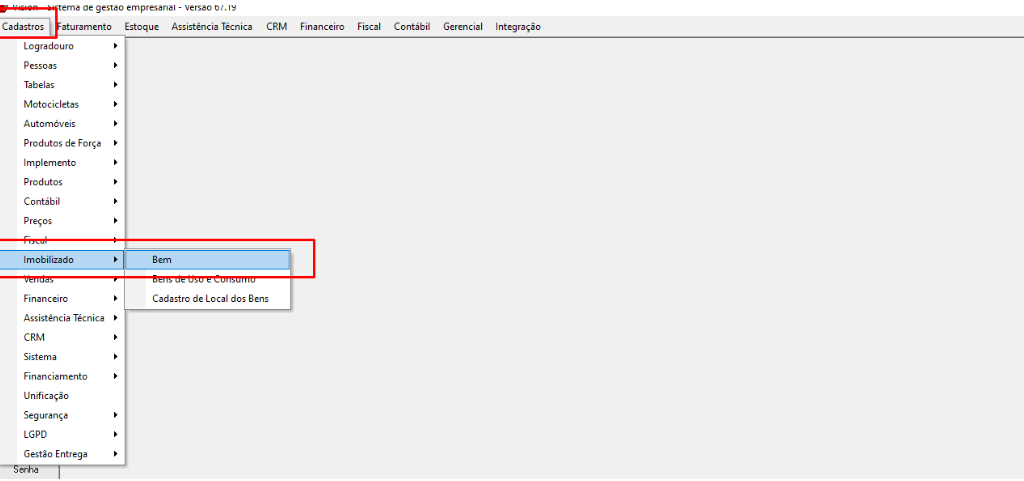


Passo 2:
**Tutorial: Lançamento de Notas Fiscais de Imobilizado**


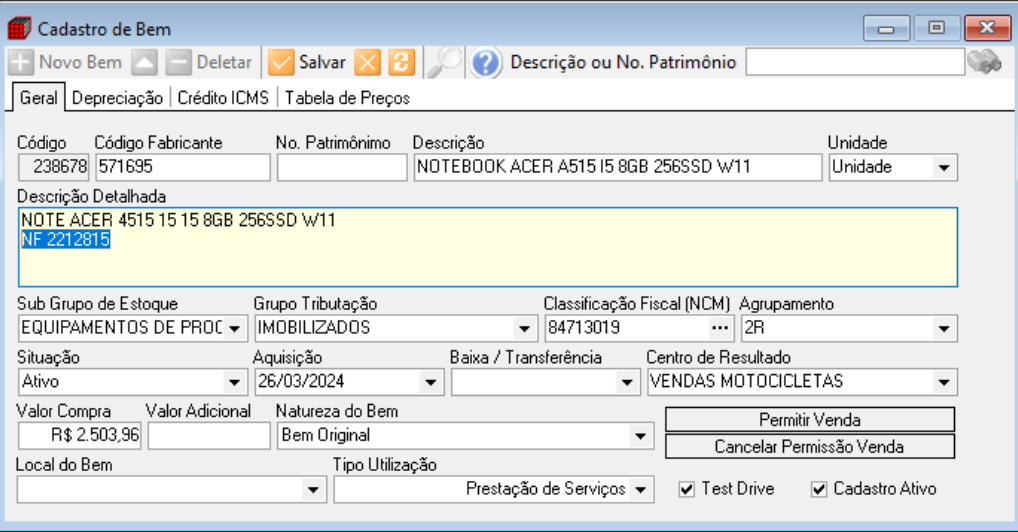


Passo 3:
**Passo 1: Cadastrar a Entrada de Imobilizado**


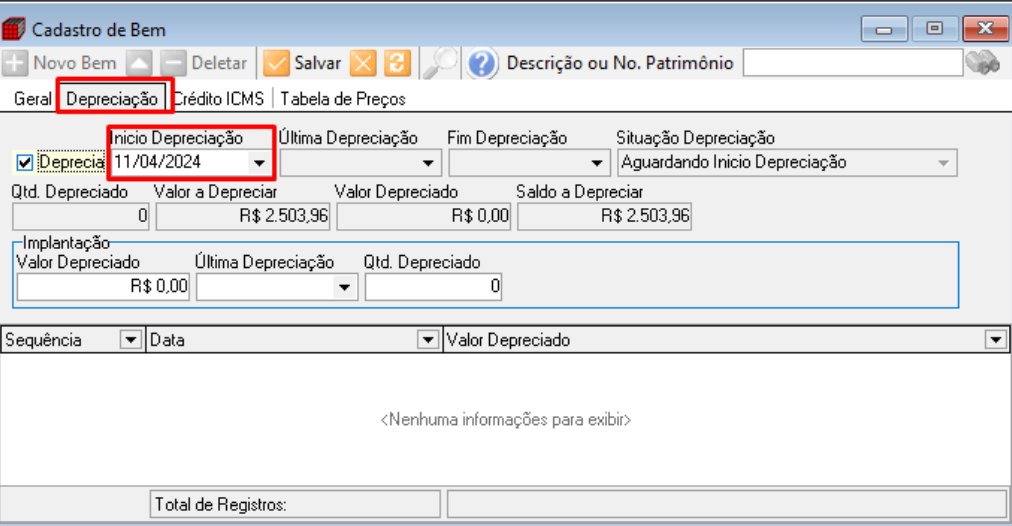


Passo 4:
Para começar, é necessário cadastrar a entrada de imobilizado no sistema de gestão. Para fazer isso, acesse a tela de "Gestão de Entradas/Imobilizado/Compra Imobilizado".


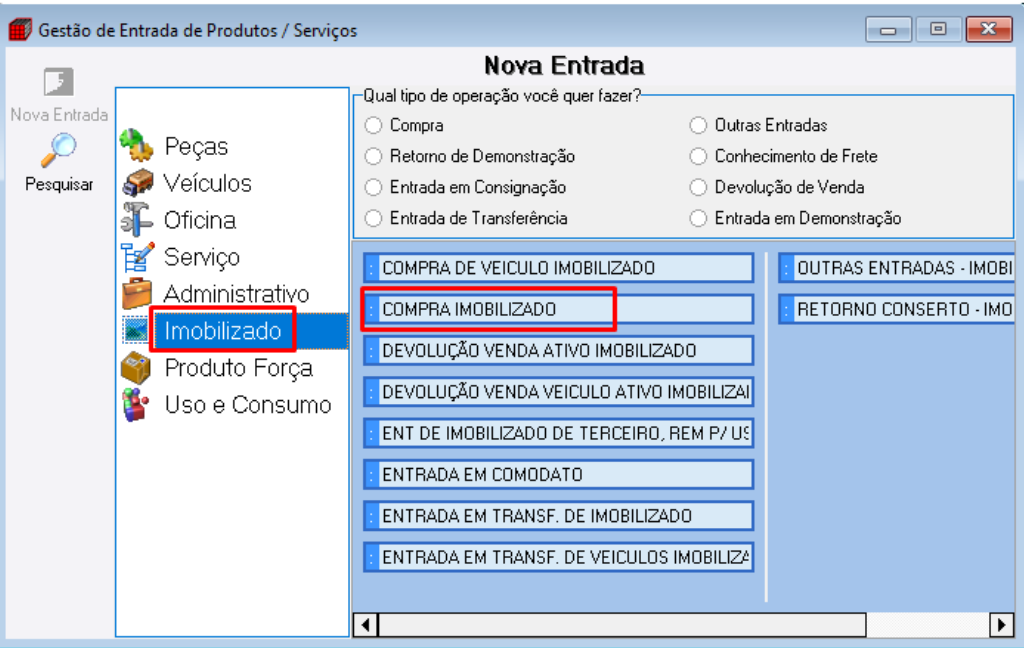


Passo 5:
**Passo 2: Inserir Dados da Nota Fiscal**


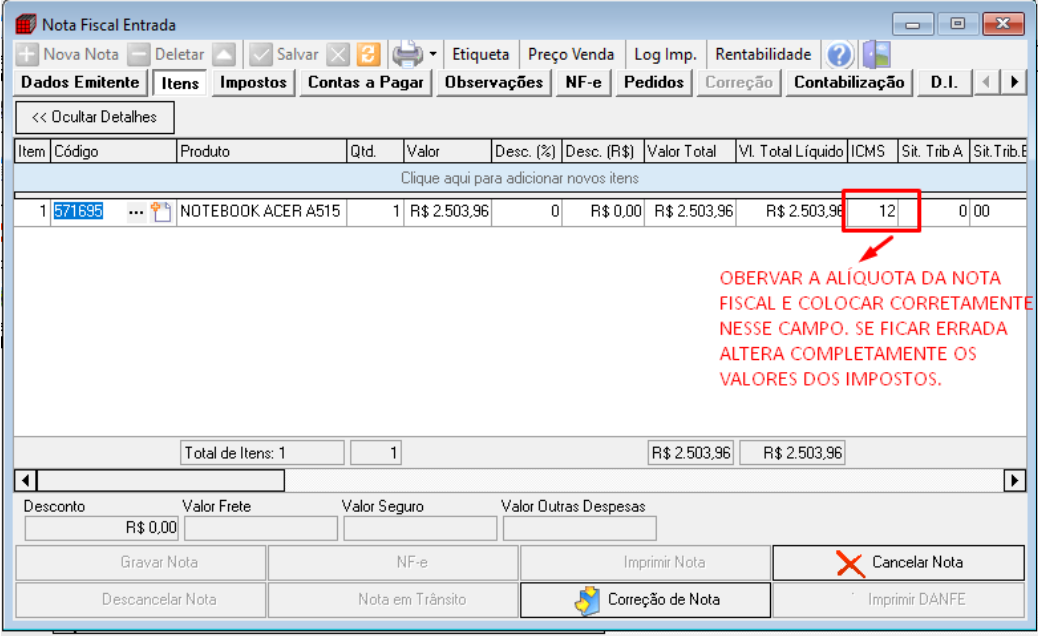


Passo 6:
Na tela de cadastro, insira a data de entrada da nota fiscal e os demais dados necessários. Certifique-se de que a data de entrada esteja correta, pois essa informação será utilizada para lançar a nota fiscal.


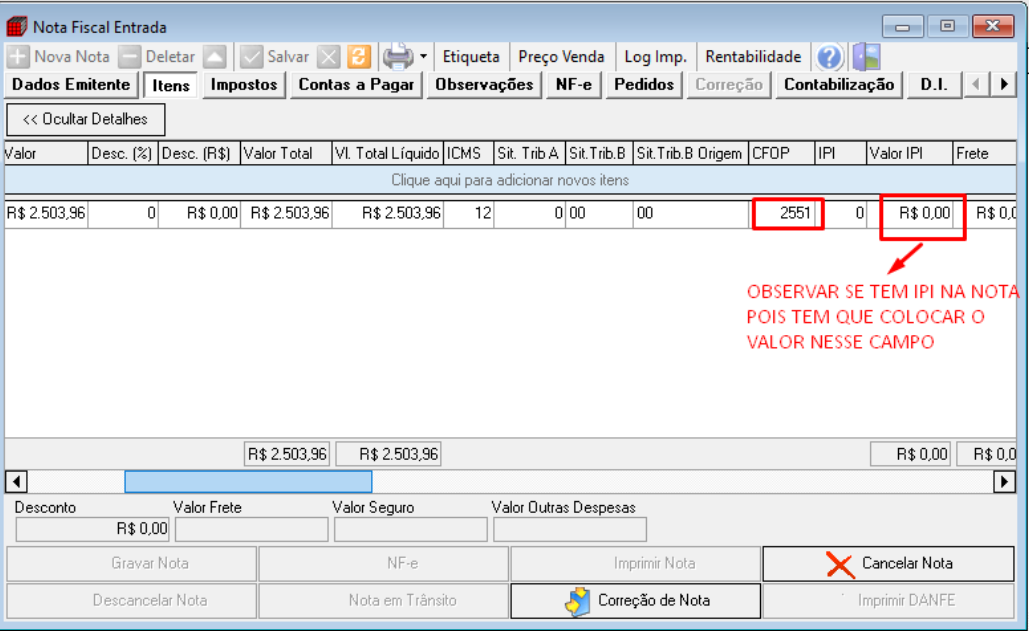


Passo 7:
**Passo 3: Salvar a Entrada de Imobilizado**


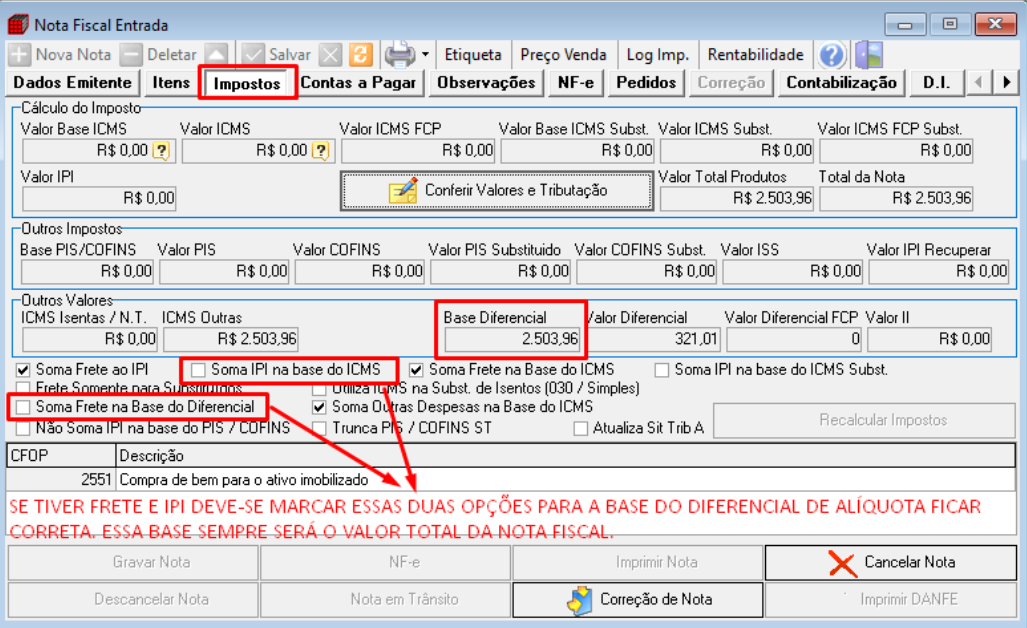


Passo 8:
Após inserir todos os dados, clique em "Salvar" para confirmar a entrada de imobilizado.


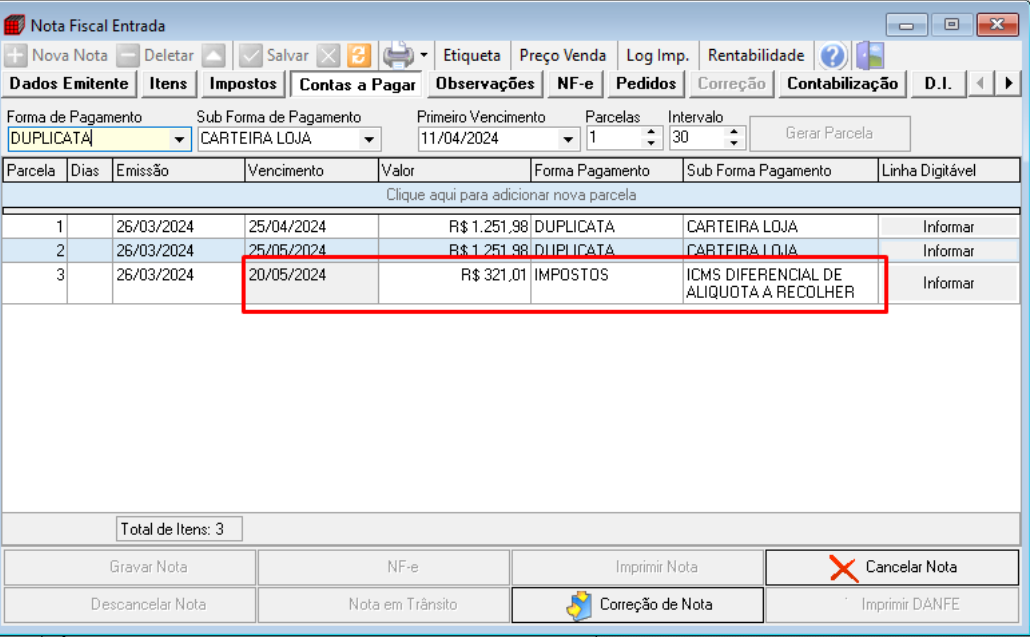


Tutorial concluído! Espero que tenha sido útil.
Em caso de dúvidas, estou à disposição para ajudar.


In [78]:
# Configurações
imagens_dir = r"C:\Users\Graúna Motos\Documents\notebook\image"
    
    # Cria instância do gerador de tutoriais
tutorial_gen = TutorialGenerator(imagens_dir=imagens_dir, db=db, chain=chain)
    
    # Gera tutorial
query = "Como fazer lançamento de notas fiscais de imobilizado?"
tutorial_gen.exibir_tutorial(query)


Passo 1:
Para emitir uma nota fiscal de bens do ativo imobilizado, é necessário seguir os seguintes passos:

1. Primeiramente, é preciso criar o bem do ativo imobilizado no sistema contabil/fiscal. Isso significa que você deve registrar as informações do bem, como sua descrição, valor de aquisição, data de aquisição e localização, entre outros dados relevantes.
2. Após a criação do bem no sistema, você poderá lançar a nota fiscal dele. Para isso, é necessário preencher os dados da nota, como o número e a data de emissão, o nome e o CPF/CNPJ do emitente e do destinatário, além do valor total da nota e a quantidade de itens.
3. É importante destacar que a nota fiscal deve ser emitida na data de aquisição do bem ou em data posterior, mas nunca em data anterior. Além disso, a nota fiscal deve ser emitida em nome do proprietário do bem, seja uma pessoa física ou jurídica.
4. Por fim, é recomendável manter uma cópia da nota fiscal e do registro do bem no ativo imobilizado, para fins de cons

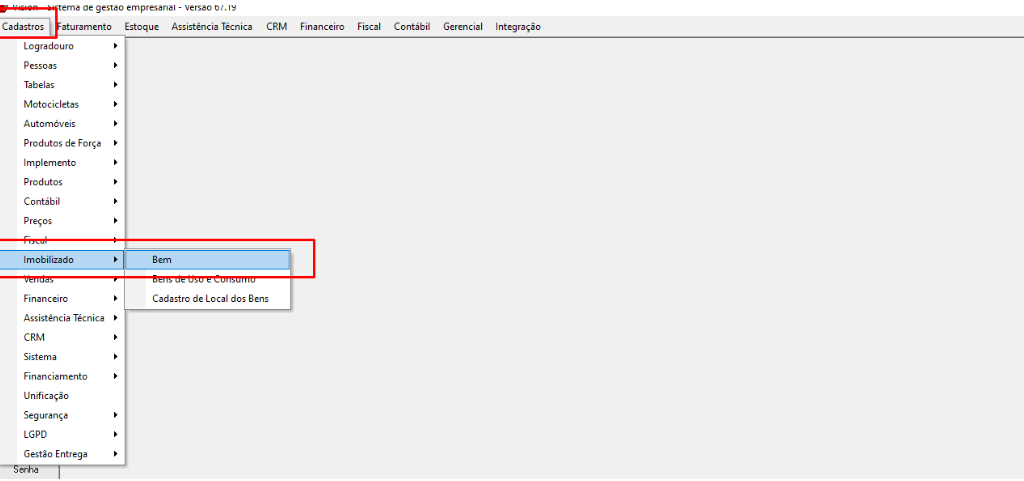


Passo 2:
Certifique-se de preencher todos os campos obrigatórios no formulário. É especialmente importante fornecer uma descrição completa e detalhada do item em questão. Além disso, na descrição detalhada, por favor inclua o número da nota fiscal da compra. Essa informação nos ajudará a processar sua solicitação de forma mais eficiente e precisa.


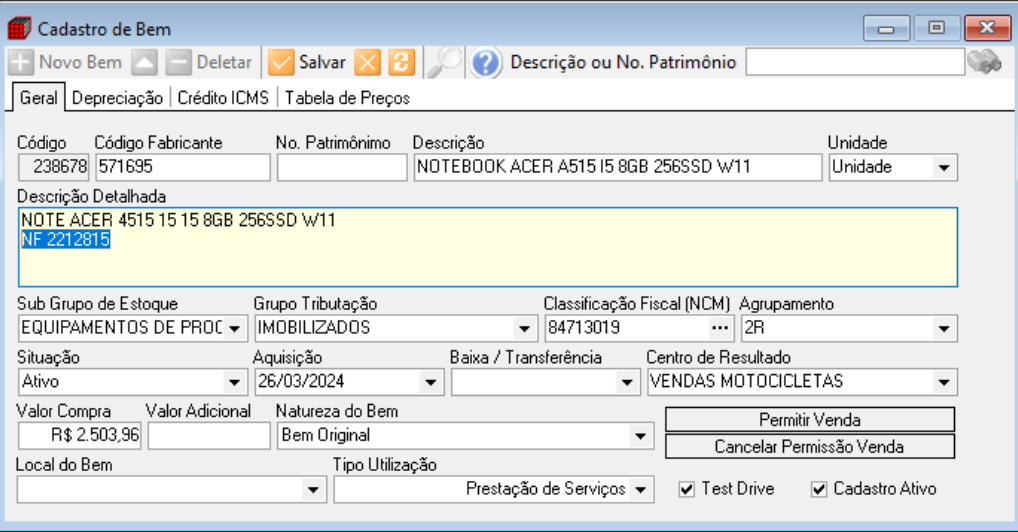


Passo 3:
No menu "Depreciação", é necessário inserir a data de emissão ou entrada da nota fiscal no sistema. Depois de inserir a data, clique no botão "Salvar" para armazenar as informações.

É importante ressaltar que a data inserida deve ser a data em que a nota fiscal foi emitida ou recebida no seu estabelecimento, pois essa informação será utilizada no cálculo da depreciação dos bens adquiridos. Portanto, é fundamental que as informações sejam inseridas corretamente para garantir a precisão dos cálculos futuros.


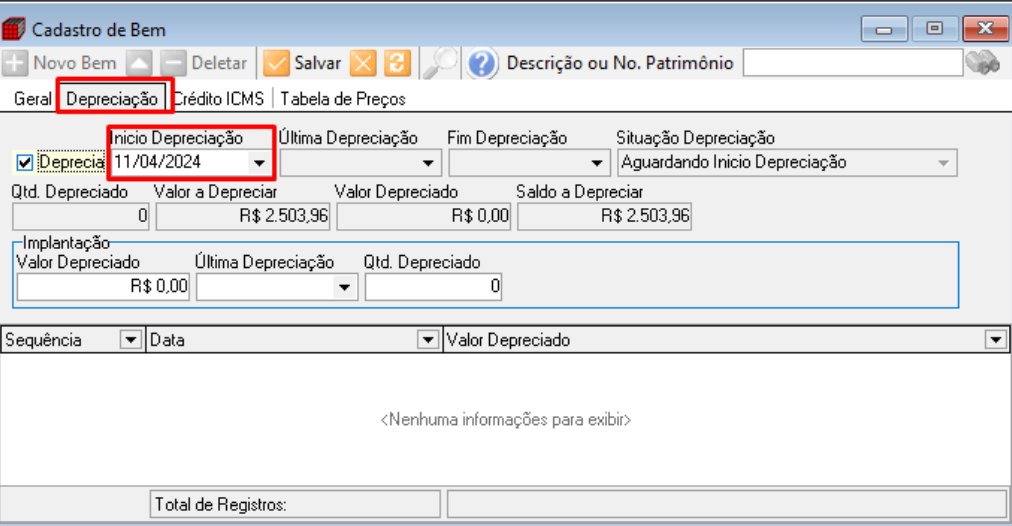


Passo 4:
Agora, vamos proceder com a entrada da Nota Fiscal de "Compra de Imobilizado". Para isso, acesse a gestão de "Entradas/Imobilizado/Compra Imobilizado". Nesta seção, você será capaz de registrar a compra de bens que serão considerados imobilizados na sua empresa, como equipamentos, veículos ou imóveis. Certifique-se de preencher todos os campos corretamente, incluindo o número da nota fiscal, a data da transação, o fornecedor e os detalhes do item adquirido, para que a entrada seja registrada de forma adequada no sistema contabil.


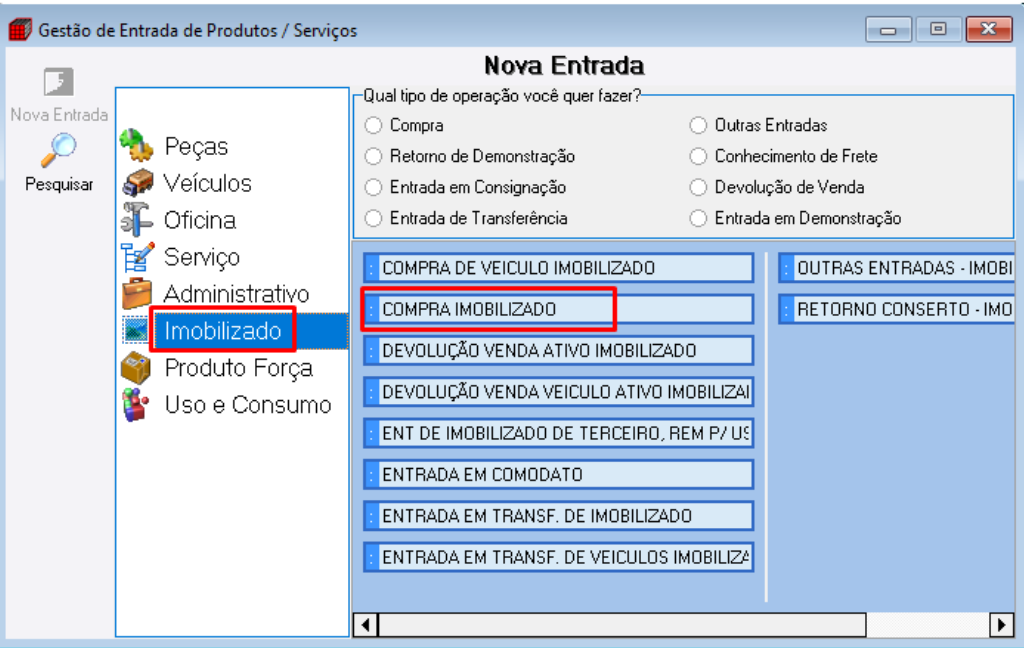


Passo 5:
Se o produto foi adquirido de fora do estado e o CST (Código de Segmentação de Tributos) é 00 ou 020, será cobrado o ICMS diferencial (Imposto sobre Circulação de Mercadorias e Serviços) com uma alíquota específica. Isso significa que, além do ICMS normal, há um adicional de imposto a ser pago neste caso. Portanto, é importante verificar o CST e o estado de origem da mercadoria para calcular o ICMS devido corretamente.


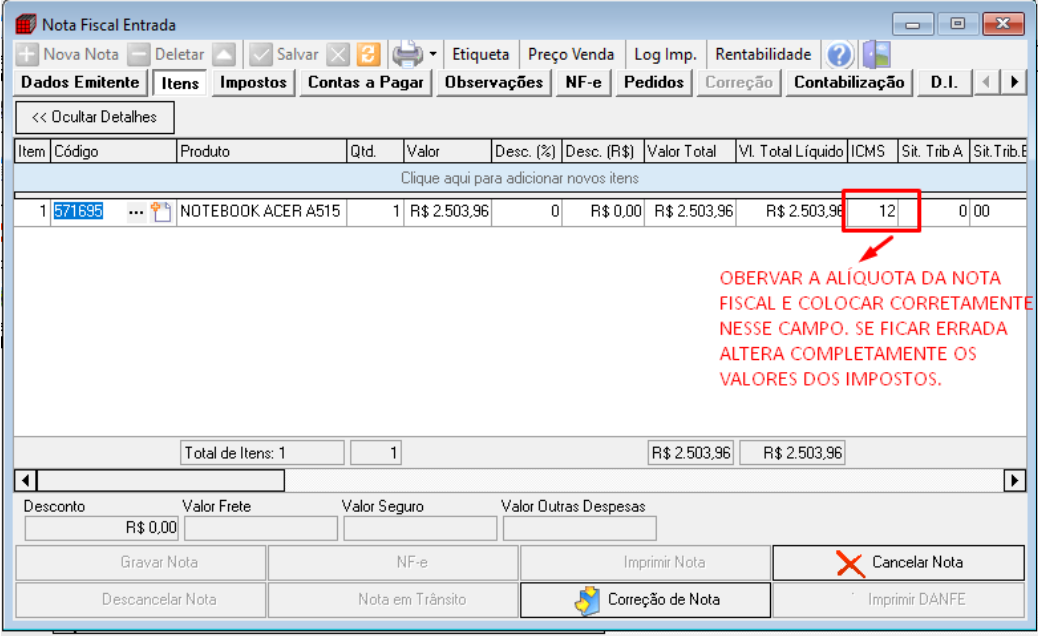


Passo 6:
A CFOP (Código de Funcionamento Operacional) para compras de ativo imobilizado fora do estado será 2551. É importante ressaltar que essa alíquota se aplica de acordo com a nota fiscal e você deve marcar as opções de somar fretes e IPI (caso haja) para calcular o valor correto do ICMS diferencial. Essa regra também se aplica às notas de compra de materiais de uso e consumo, materiais de informática, quando a mercadoria é adquirida fora do estado e o CSTFOR for 000 ou 020.


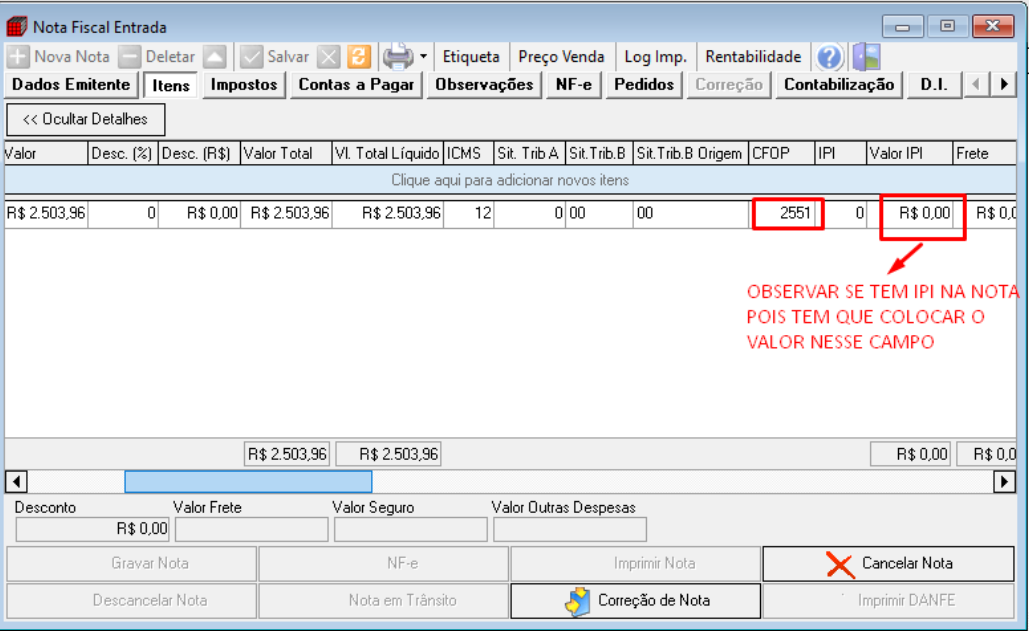


Passo 7:
Nesta seção, precisamos configurar as opções referentes a impostos. Siga as etapas abaixo:

1. Marque as duas opções "Frete" e "IPI", caso seu produto ou serviço esteja sujeito a esses tributos. Isso garantirá que os cálculos sejam realizados corretamente.

2. Verifique se o valor da base do ICMS diferencial de alíquota está correto. É importante que esse valor seja igual ao total do DANFE (Documento Auxiliar da Nota Fiscal Eletrônica). Isso assegurará que o cálculo do ICMS diferencial seja realizado com precisão, evitando assim quaisquer problemas futuros.

Lembre-se de prestar atenção a esses detalhes para garantir a correta tributação dos seus produtos ou serviços. Caso tenha alguma dúvida, consulte a documentação ou entre em contato com o suporte técnico.


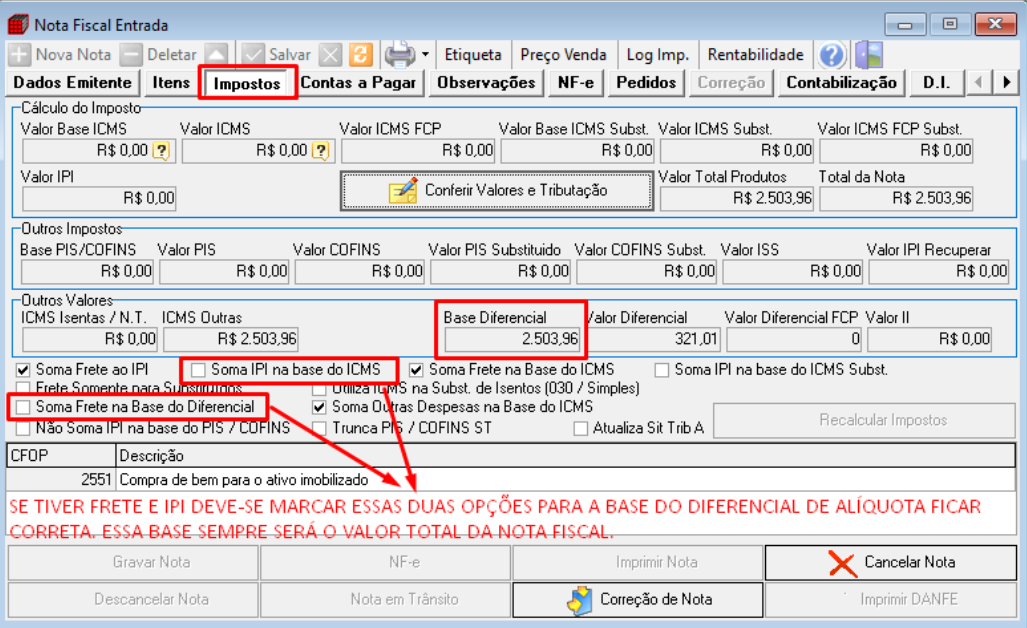


Passo 8:
Nesta seção, iremos explicar como editar a data de vencimento da duplicata de diferença na aba "Contas a Pagar". É importante prestar atenção a este procedimento, pois garantirá que a data seja alterada corretamente.

Para editar a data de vencimento da duplicata de diferença, siga os seguintes passos:

1. Acesse a aba "Contas a Pagar" no sistema;
2. Localize a duplicata de diferença que deseja editar;
3. Clique no botão "Editar" ao lado da duplicata selecionada;
4. Na tela de edição, altere a data de vencimento para o dia 20 do mês seguinte;
5. Clique em "Salvar" para confirmar a alteração.

É fundamental que você sempre defina a data de vencimento da duplicata de diferença para o dia 20 do mês seguinte, a fim de manter a consistência e evitar confusões ou atrasos nos pagamentos. Lembre-se de salvar as alterações após as modificações.


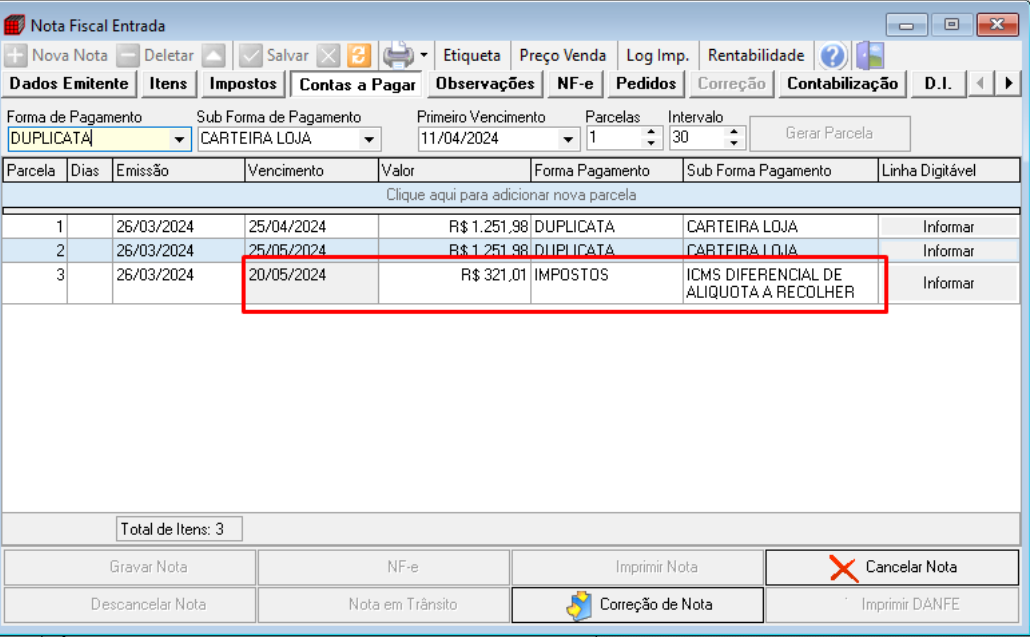

In [8]:
import os
from groq import Groq
from PIL import Image

# Inicializa o cliente Groq
client = Groq(
    api_key="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"
)

# Texto do tutorial dividido em seções
textos = [
    "PARA LANÇAR UMA NOTA FISCAL DE IMOBILIZADO, PRIMEIRAMENTE DEVE-SE CRIAR O BEM DO ATIVO IMOBILIZADO",
    "PREENCHER TODOS OS CAMPOS SOLICITADOS,PRENCHER A DESCRIÇÃO COMPLETA DO ITEM E NA DESCRIÇÃO DETALHADA INCLUIR O NUMERO DA NOTAFISCAL DA COMPRA.",
    "NA ABA DEPRECIAÇÃO, COLOCAR A DATA DA ENTRADA DA NOTA FISCAL NO SISTEMA. \"SALVAR\"",
    "AGORA DAR ENTRADA NA NOTA FISCAL \"COMPRA DE IMOBILIZADO\" GESTÃO DE ENTRADAS/IMOBILIZADO/COMPRA IMOBILIZADO",
    "SE A MERCADORIA FOI COMPRADA DE FORA DO ESTADO E O CST FOR 00 OU 020, SERÁ COBRADO O ICMS DIFERENCIAL DE ALIQUOTA.",
    "CFOP DE COMPRA DE ATIVO IMOBILIZADO DE FORA DO ESTADO SERÁ 2551 OBS:ESSA REGRA DA ALÍQUOTA CONFORME A NOTA FISCAL E MARCAR AS OPÇÕES DE SOMAR FRETE E IPI(CASO TENHA)PARA CALCULAR O VALOR CORRETO DO ICMS DIFERENCIAL, VALE TAMBÉM PARA NOTAS DE COMPPRA DE MATERIAL DE USO E CONSUMO, MATERIAL DE INFORMÁTICA, QUANDO A MERCADORIA É COMPRADA FORA DO ESTADO E O CSTFOR 000,020...",
    "NA ABA IMPOSTOS MARCAR AS DUAS OPÇÕES CASO TENHA FRETE E IPI.VERIFICAR SE ABASE DO ICMS DIFERENCIAL DE ALÍQUOTA ESTÁ CORRETA(TEM QUE SER O VALOR TOTAL DANF)",
    "NA ABA CONTAS A PAGAR, EDITAR O VENCIMENTO DA DUPLICATA DO DIFERENCIAL SEMPRE PARAO DIA 20 DO MÊS SEGUINTE"
]


path = './image'
imagens = []
for i in range(1, 9):
    imagem_path = os.path.join(path, f'image_{i}.png')
    if os.path.exists(imagem_path):
        imagem = Image.open(imagem_path)
        imagens.append(imagem)




# Exibe as imagens e textos com explicações didáticas da API Groq
for i, (texto, imagem) in enumerate(zip(textos, imagens), 1):
    # Gera explicação didática usando a API Groq
    prompt = f"Reescreva o seguinte texto de forma mais didática e clara em português, mantendo todas as informações importantes: {texto}"
    
    response = client.chat.completions.create(
        messages=[
            {
                "role": "user", 
                "content": prompt
            }
        ],
        model="llama3-70b-8192",
        temperature=0.5,
    )
    
    texto_didatico = response.choices[0].message.content
    
    print(f"\nPasso {i}:")
    print(f"{texto_didatico}")
    display(imagem)
